# Importing libraries

In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statistics

pd.set_option('display.max_columns', None)

In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importying the data

In [50]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df3 = pd.read_excel('attrition_file.xlsx')

In [51]:
df = df1.merge(df2)
df = pd.concat([df, df3])

In [52]:
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


# Data Description and Exploratory Visualisations

## Overview

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5919 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            5919 non-null   int64  
 1   Age                       5919 non-null   float64
 2   BusinessTravel            5919 non-null   object 
 3   DailyRate                 5919 non-null   float64
 4   Department                5919 non-null   object 
 5   DistanceFromHome          5919 non-null   float64
 6   Education                 5919 non-null   float64
 7   EducationField            5919 non-null   object 
 8   EmployeeCount             5919 non-null   float64
 9   EnvironmentSatisfaction   5919 non-null   float64
 10  Gender                    5919 non-null   object 
 11  HourlyRate                5919 non-null   float64
 12  JobInvolvement            5919 non-null   float64
 13  JobLevel                  5919 non-null   float64
 14  JobRole 

In [54]:
# Mamy brakujące wartości w Attrition (5772) i YearlyIncome(4449)
# YearlyIncome = MonthlyIncome * 12 

df['YearlyIncome'] = df['YearlyIncome'].fillna(df['MonthlyIncome'] * 12)

In [55]:
df = df.dropna(how='any')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5772 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            5772 non-null   int64  
 1   Age                       5772 non-null   float64
 2   BusinessTravel            5772 non-null   object 
 3   DailyRate                 5772 non-null   float64
 4   Department                5772 non-null   object 
 5   DistanceFromHome          5772 non-null   float64
 6   Education                 5772 non-null   float64
 7   EducationField            5772 non-null   object 
 8   EmployeeCount             5772 non-null   float64
 9   EnvironmentSatisfaction   5772 non-null   float64
 10  Gender                    5772 non-null   object 
 11  HourlyRate                5772 non-null   float64
 12  JobInvolvement            5772 non-null   float64
 13  JobLevel                  5772 non-null   float64
 14  JobRole 

In [139]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [57]:
df.shape

(5772, 36)

### Numerical features overview

In [58]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.0,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.0,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000
mean,3845.446292,329.238739,801.261954,25699.795045,2.908351,1.0,2.720201,65.999480,2.738565,2.054747,2.724359,6465.915281,14278.280492,2.681393,15.175676,3.148302,2.722280,80.0,0.789328,266.720201,2.802322,2.764726,234.962405,274.691961,297.941441,250.559771,77590.983368
std,2831.511199,1384.231264,405.075849,128374.957376,1.025791,0.0,1.092430,20.304607,0.711382,1.103601,1.105621,4681.564367,7144.643608,2.492306,3.633006,0.355430,1.080042,0.0,0.849824,1310.405770,1.299097,0.708208,1193.633200,1287.515613,1390.287017,1244.598965,56178.772407
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1047.000000,30.000000,459.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5093.500000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4877.000000,14199.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58524.000000
75%,6536.250000,44.000000,1162.000000,16.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8321.000000,20471.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,99852.000000
max,7979.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


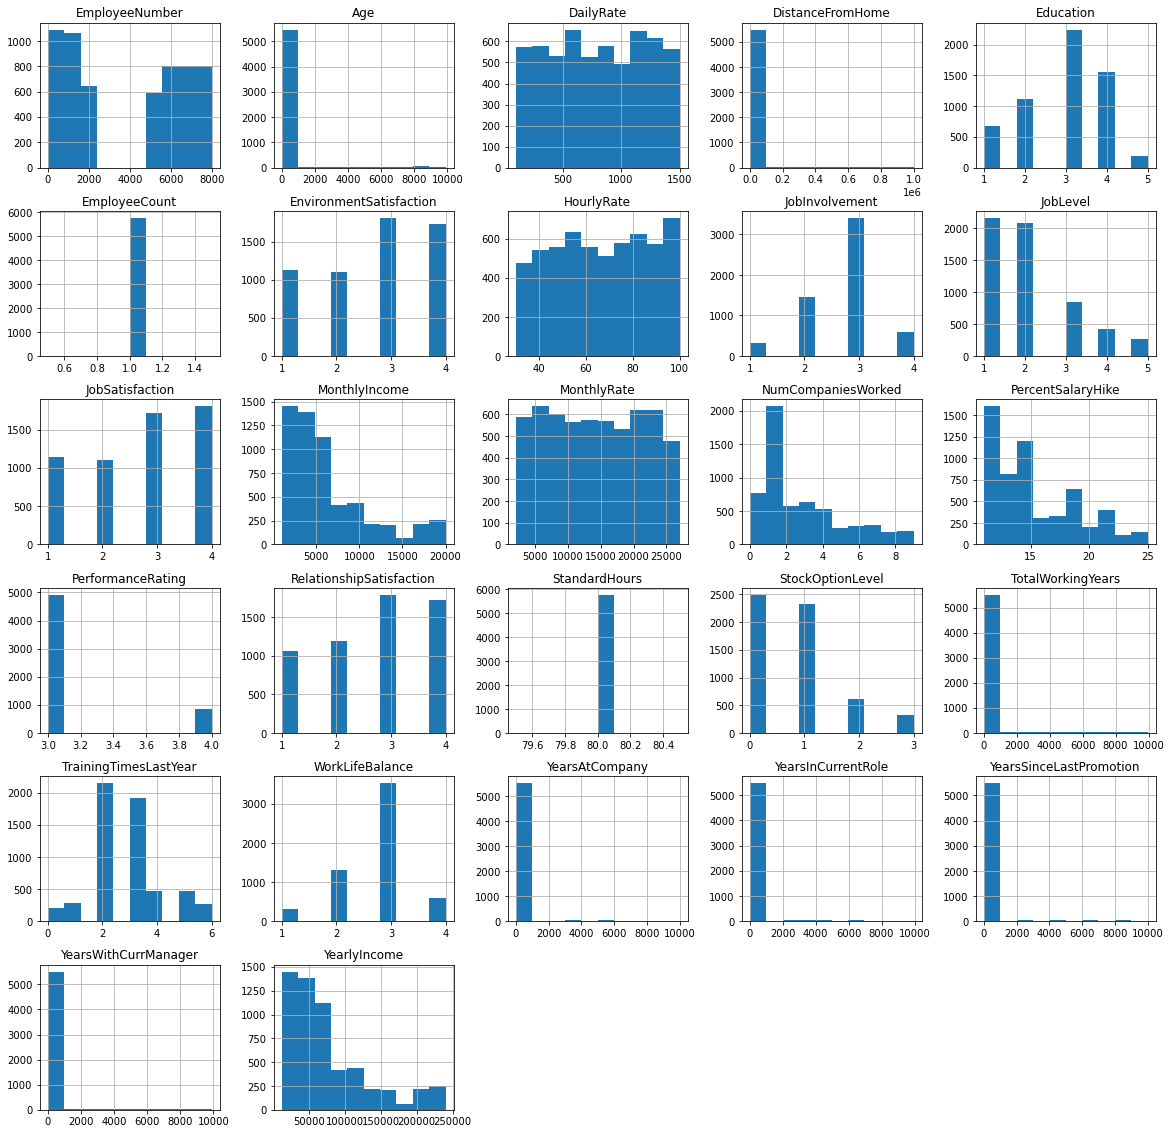

In [59]:
df.hist(figsize=(20, 20))
plt.show()

In [23]:
# Age ma wartości odstające, ktoś ma ponad 2000 lat
# DistanceFromHome ma wartości odstające, w jakich jednostkach są wartości?
# EmployeeCount nie niesie żadnych informacji
# StandardHours nie niesie żadnych informacji
# TotalWorkingYears ma wartości odstające, ktoś pracuje 10000 lat
# YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager analogicznie
# Część danych ma 'tail-heavy'

## Data Cleaning

In [60]:
df = df.drop(['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1)
    
del_columns = ['Age', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
               'YearsSinceLastPromotion', 'YearsWithCurrManager']

for column in del_columns:
    df = df[df[column] < 80]
    
df= df[df['DistanceFromHome'] < 4720]

In [95]:
df.shape

(3821, 32)

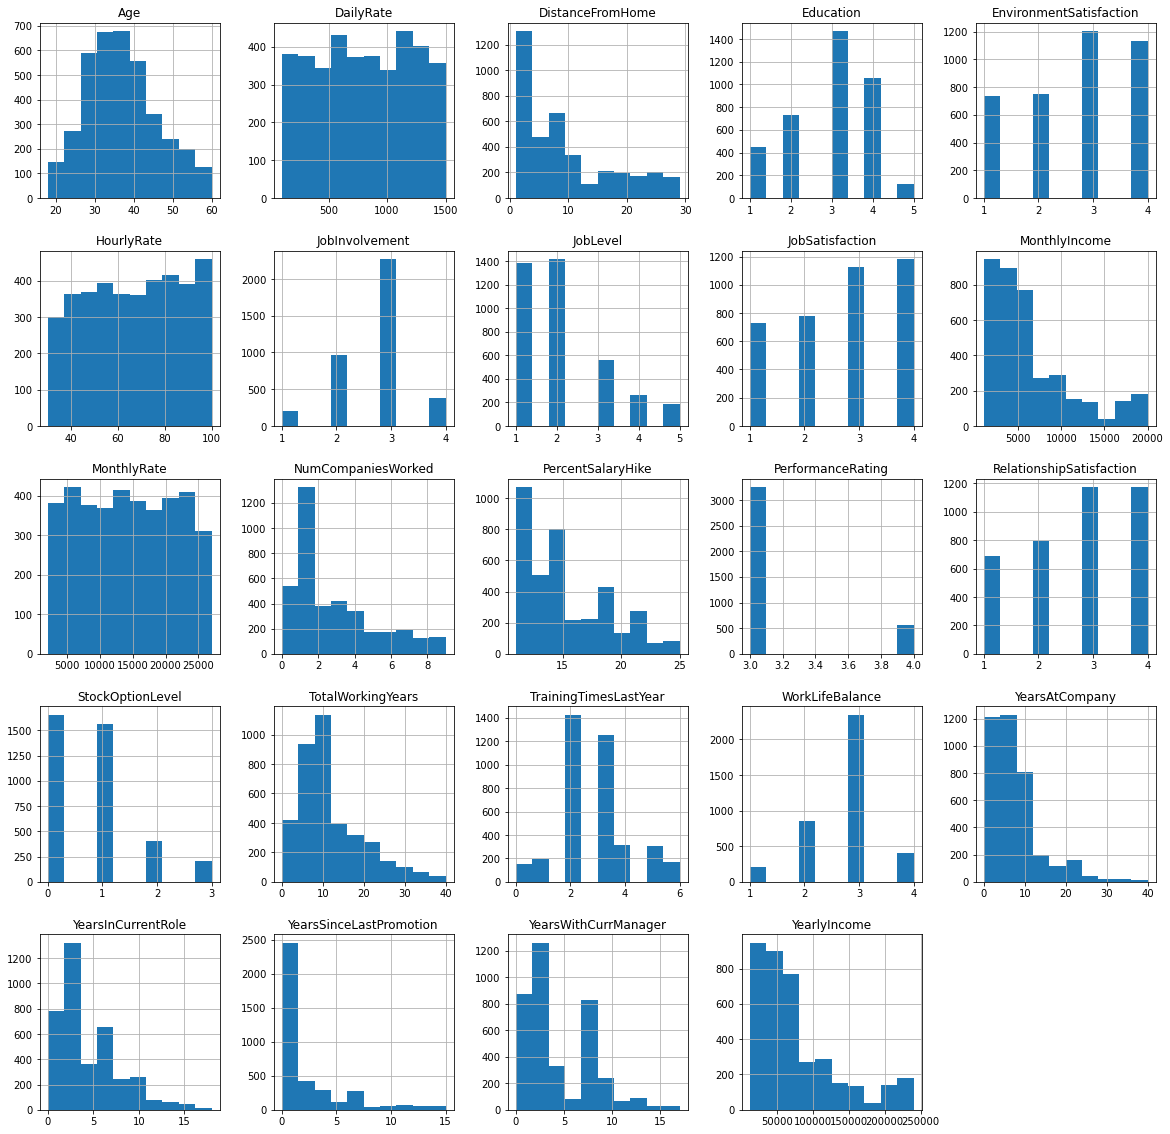

In [96]:
df.hist(figsize=(20, 20))
plt.show()

## Feature distribution by target attribute

In [144]:
columns = dict(df.columns.groupby(df.dtypes))
columns

{dtype('float64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'OverTime'],
       dtype='object')}

In [63]:
general = ['Age', 'Department', 'Education', 'EducationField', 'Gender',  'MaritalStatus', 'OverTime']


work_conditions = ['JobSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
                   'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 
                   'YearsWithCurrManager', 'NumCompaniesWorked']

# General features

### Age

In [64]:
attrition_yes = round(df.loc[df['Attrition'] == 'Yes', 'Age'].mean(), 2)
attrition_no = round(df.loc[df['Attrition'] == 'No', 'Age'].mean(), 2)

attrition_yes_std = round(df.loc[df['Attrition'] == 'Yes', 'Age'].std(), 2)
attrition_no_std = round(df.loc[df['Attrition'] == 'No', 'Age'].std(), 2)
print(f'Byli pracownicy: średnia = {attrition_yes}, odchylenie: {attrition_yes_std}')
print(f'Obecni pracownicy: średnia = {attrition_no}, odchylenie: {attrition_no_std}')

Byli pracownicy: średnia = 35.72, odchylenie: 9.47
Obecni pracownicy: średnia = 37.47, odchylenie: 8.91


### Department

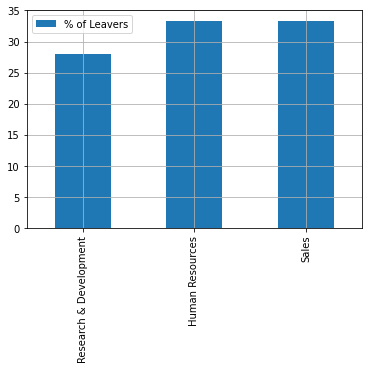

,Category,% of Leavers
0,Research & Development,28.071571
1,Human Resources,33.333333
2,Sales,33.304348


In [65]:
dep_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(df['Department'].unique()):
    ratio = df[(df['Department'] == item) & (df['Attrition'] == 'Yes')].shape[0] / df[df['Department'] == item].shape[0]
    dep_col.loc[item] = (item, ratio * 100)

dep_col.plot(kind='bar', grid=True)
plt.show()
dep_col = dep_col.reset_index(drop=True)
dep_col

### Education

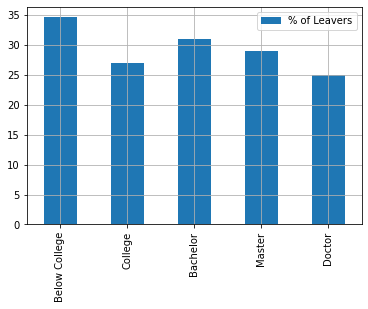

,Category,% of Leavers
0,Below College,34.606742
1,College,26.949384
2,Bachelor,30.931339
3,Master,28.937381
4,Doctor,25.000000


In [66]:
# Rozkład attrition w danej categorii 
# w 'Master' 37% ludzi odeszło, (247/ 409 + 247)  247 = yes, 409 = No

edu_columns = {
1.0 :'Below College',
2.0 :'College',
3.0 :'Bachelor',
4.0 :'Master',
5.0 :'Doctor'}

df_edu = df.loc[:, ('Education', 'Attrition')]

df_edu['Education'] = df_edu['Education'].astype('category')
df_edu['Education'] = df_edu['Education'].cat.rename_categories(edu_columns)

edu_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(df_edu['Education'].unique()):
    ratio = df_edu[(df_edu['Education'] == item) & (df_edu['Attrition'] == 'Yes')].shape[0] / df_edu[df_edu['Education'] == item].shape[0]
    edu_col.loc[item] = (item, ratio * 100)

edu_col.plot(kind='bar', grid=True)
plt.show()
edu_col = edu_col.reset_index(drop=True)
edu_col

### Education Field

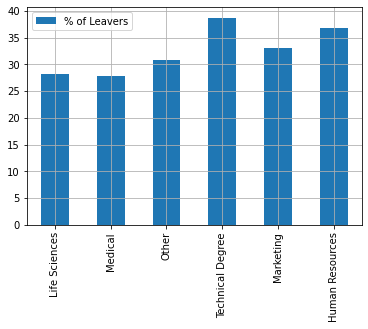

,Category,% of Leavers
0,Life Sciences,28.192162
1,Medical,27.768456
2,Other,30.769231
3,Technical Degree,38.736264
4,Marketing,32.994924
5,Human Resources,36.764706


In [67]:
edf_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(df['EducationField'].unique()):
    ratio = df[(df['EducationField'] == item) & (df['Attrition'] == 'Yes')].shape[0] / df[df['EducationField'] == item].shape[0]
    edf_col.loc[item] = (item, ratio * 100)

edf_col.plot(kind='bar', grid=True)
plt.show()
edf_col = edf_col.reset_index(drop=True)
edf_col

### Gender

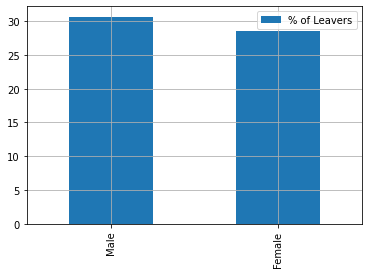

,Category,% of Leavers
0,Male,30.679862
1,Female,28.590514


In [68]:
gen_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(df['Gender'].unique()):
    ratio = df[(df['Gender'] == item) & (df['Attrition'] == 'Yes')].shape[0] / df[df['Gender'] == item].shape[0]
    gen_col.loc[item] = (item, ratio * 100)

gen_col.plot(kind='bar', grid=True)
plt.show()

gen_col = gen_col.reset_index(drop=True)
gen_col

### Marital Status

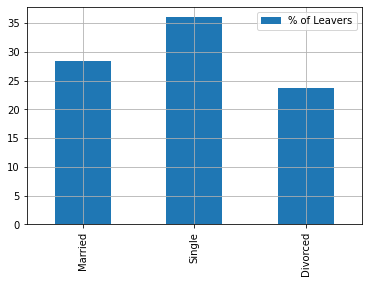

,Category,% of Leavers
0,Married,28.451178
1,Single,36.019737
2,Divorced,23.815310


In [69]:
mor_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(df['MaritalStatus'].unique()):
    ratio = df[(df['MaritalStatus'] == item) & (df['Attrition'] == 'Yes')].shape[0] / df[df['MaritalStatus'] == item].shape[0]
    mor_col.loc[item] = (item, ratio * 100)

mor_col.plot(kind='bar', grid=True)
plt.show()

mor_col = mor_col.reset_index(drop=True)
mor_col

### Over Time

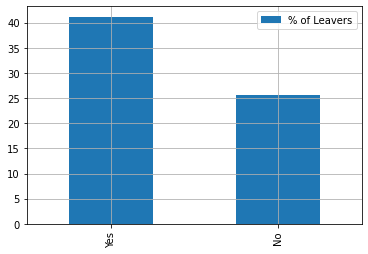

,Category,% of Leavers
0,Yes,41.170916
1,No,25.524982


In [70]:
ovt_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime'] == item) & (df['Attrition'] == 'Yes')].shape[0] / df[df['OverTime'] == item].shape[0]
    ovt_col.loc[item] = (item, ratio * 100)

ovt_col.plot(kind='bar', grid=True)
plt.show()

ovt_col = ovt_col.reset_index(drop=True)
ovt_col

### Distance from Home

In [71]:
print(f"Odległość z domu do pracy waha się pomiędzy {df['DistanceFromHome'].min()} a {df['DistanceFromHome'].max()} mil.")

Odległość z domu do pracy waha się pomiędzy 1.0 a 29.0 mil.


In [72]:
dfh_data = df.loc[:, ('DistanceFromHome', 'Attrition')]

years_max = dfh_data['DistanceFromHome'].max()
years_min = dfh_data['DistanceFromHome'].min()

bins = np.linspace(years_min, years_max, 8)
bins = [int(x) for x in bins]


dfh_data['DistanceFromHome'] = pd.cut(dfh_data['DistanceFromHome'], bins=bins, include_lowest=True)

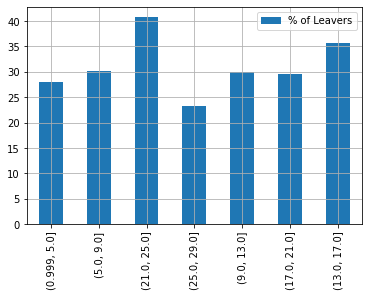

,Category,% of Leavers
0,"(0.999, 5.0]",28.044280
1,"(5.0, 9.0]",30.147059
2,"(21.0, 25.0]",40.800000
3,"(25.0, 29.0]",23.245614
4,"(9.0, 13.0]",29.923274
5,"(17.0, 21.0]",29.554656
6,"(13.0, 17.0]",35.741445


In [74]:
dfh_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(dfh_data['DistanceFromHome'].unique()):
    ratio = dfh_data[(dfh_data['DistanceFromHome'] == item) & (dfh_data['Attrition'] == 'Yes')].shape[0] / dfh_data[dfh_data['DistanceFromHome'] == item].shape[0]
    dfh_col.loc[item] = (item, ratio * 100)

dfh_col.plot(kind='bar', grid=True)
plt.show()

dfh_col = dfh_col.reset_index(drop=True)
dfh_col

# Work conditions

### Job Satisfaction

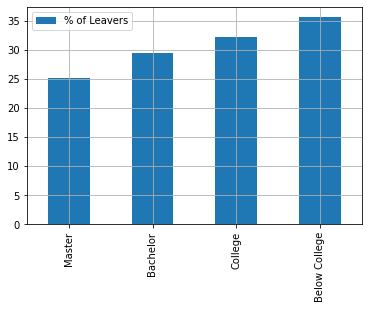

,Category,% of Leavers
0,Master,25.190194
1,Bachelor,29.495128
2,College,32.133676
3,Below College,35.567715


In [75]:
js_columns = {
1.0 :'Low',
2.0 :'Medium',
3.0 :'High',
4.0 :'Very High'}

df_js = df.loc[:, ('JobSatisfaction', 'Attrition')]

df_js['JobSatisfaction'] = df_js['JobSatisfaction'].astype('category')
df_js['JobSatisfaction'] = df_js['JobSatisfaction'].cat.rename_categories(edu_columns)

js_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(df_js['JobSatisfaction'].unique()):
    ratio = df_js[(df_js['JobSatisfaction'] == item) & (df_js['Attrition'] == 'Yes')].shape[0] / df_js[df_js['JobSatisfaction'] == item].shape[0]
    js_col.loc[item] = (item, ratio * 100)

js_col.plot(kind='bar', grid=True)
plt.show()
js_col = js_col.reset_index(drop=True)
js_col

### Total Working Years

In [76]:
twy_data = df.loc[:, ('TotalWorkingYears', 'Attrition')]

years_max = twy_data['TotalWorkingYears'].max()
years_min = twy_data['TotalWorkingYears'].min()

bins = np.linspace(years_min, years_max, 10)
bins = [int(x) for x in bins]

twy_data['TotalWorkingYears'] = pd.cut(twy_data['TotalWorkingYears'], bins=bins, include_lowest=True)

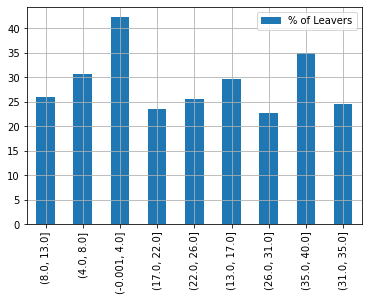

,Category,% of Leavers
0,"(8.0, 13.0]",25.966851
1,"(4.0, 8.0]",30.784124
2,"(-0.001, 4.0]",42.241379
3,"(17.0, 22.0]",23.582090
4,"(22.0, 26.0]",25.568182
5,"(13.0, 17.0]",29.715762
6,"(26.0, 31.0]",22.689076
7,"(35.0, 40.0]",35.000000
8,"(31.0, 35.0]",24.615385


In [77]:
twy_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(twy_data['TotalWorkingYears'].unique()):
    ratio = twy_data[(twy_data['TotalWorkingYears'] == item) & (twy_data['Attrition'] == 'Yes')].shape[0] / twy_data[twy_data['TotalWorkingYears'] == item].shape[0]
    twy_col.loc[item] = (item, ratio * 100)

twy_col.plot(kind='bar', grid=True)
plt.show()

twy_col = twy_col.reset_index(drop=True)
twy_col

### Work Life Balance

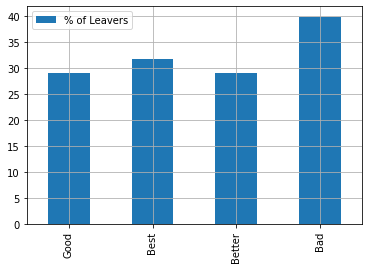

,Category,% of Leavers
0,Good,29.069767
1,Best,31.695332
2,Better,28.937260
3,Bad,39.810427


In [78]:
edu_columns = {
1.0 :'Bad',
2.0 :'Good',
3.0 :'Better',
4.0 :'Best',}

df_wlb = df.loc[:, ('WorkLifeBalance', 'Attrition')]

df_wlb['WorkLifeBalance'] = df_wlb['WorkLifeBalance'].astype('category')
df_wlb['WorkLifeBalance'] = df_wlb['WorkLifeBalance'].cat.rename_categories(edu_columns)

wlb_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(df_wlb['WorkLifeBalance'].unique()):
    ratio = df_wlb[(df_wlb['WorkLifeBalance'] == item) & (df_wlb['Attrition'] == 'Yes')].shape[0] / df_wlb[df_wlb['WorkLifeBalance'] == item].shape[0]
    wlb_col.loc[item] = (item, ratio * 100)

wlb_col.plot(kind='bar', grid=True)
plt.show()

wlb_col = wlb_col.reset_index(drop=True)
wlb_col

### Years At Company

In [79]:
yat_data = df.loc[:, ('YearsAtCompany', 'Attrition')]

years_max = yat_data['YearsAtCompany'].max()
years_min = yat_data['YearsAtCompany'].min()

bins = np.linspace(years_min, years_max, 10)
bins = [int(x) for x in bins]

yat_data['YearsAtCompany'] = pd.cut(yat_data['YearsAtCompany'], bins=bins, include_lowest=True)

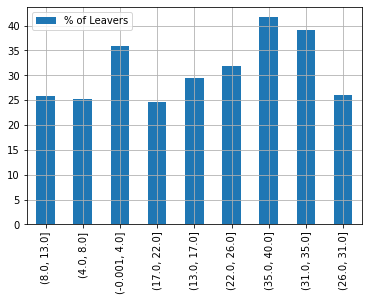

,Category,% of Leavers
0,"(8.0, 13.0]",25.783476
1,"(4.0, 8.0]",25.240175
2,"(-0.001, 4.0]",35.847797
3,"(17.0, 22.0]",24.651163
4,"(13.0, 17.0]",29.559748
5,"(22.0, 26.0]",31.818182
6,"(35.0, 40.0]",41.666667
7,"(31.0, 35.0]",39.130435
8,"(26.0, 31.0]",26.086957


In [80]:
yat_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(yat_data['YearsAtCompany'].unique()):
    ratio = yat_data[(yat_data['YearsAtCompany'] == item) & (yat_data['Attrition'] == 'Yes')].shape[0] / yat_data[yat_data['YearsAtCompany'] == item].shape[0]
    yat_col.loc[item] = (item, ratio * 100)

yat_col.plot(kind='bar', grid=True)
plt.show()

yat_col = yat_col.reset_index(drop=True)
yat_col

In [81]:
df[(df['YearsAtCompany'] > 37) & (df['YearsAtCompany'] <= 40)]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
361,58.0,Travel_Rarely,147.0,Research & Development,23.0,4.0,Medical,4.0,Female,94.0,3.0,3.0,Healthcare Representative,4.0,Married,10312.0,3465.0,1.0,No,12.0,3.0,4.0,1.0,40.0,3.0,2.0,40.0,10.0,15.0,6.0,Yes,123744.0
126,58.0,Travel_Rarely,147.0,Research & Development,23.0,4.0,Medical,4.0,Female,94.0,3.0,3.0,Healthcare Representative,4.0,Married,10312.0,3465.0,1.0,No,12.0,3.0,4.0,1.0,40.0,3.0,2.0,40.0,10.0,15.0,6.0,Yes,123744.0


### Years In Current Role

In [82]:
yicr_data = df.loc[:, ('YearsInCurrentRole', 'Attrition')]

years_max = yicr_data['YearsInCurrentRole'].max()
years_min = yicr_data['YearsInCurrentRole'].min()

bins = np.linspace(years_min, years_max, 8)
bins = [int(x) for x in bins]

yicr_data['YearsInCurrentRole'] = pd.cut(yicr_data['YearsInCurrentRole'], bins=bins, include_lowest=True)

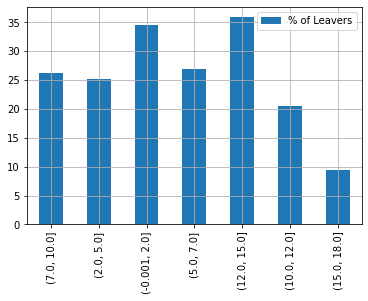

,Category,% of Leavers
0,"(7.0, 10.0]",26.147705
1,"(2.0, 5.0]",25.139665
2,"(-0.001, 2.0]",34.457143
3,"(5.0, 7.0]",26.840491
4,"(12.0, 15.0]",35.869565
5,"(10.0, 12.0]",20.512821
6,"(15.0, 18.0]",9.375000


In [83]:
yicr_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(yicr_data['YearsInCurrentRole'].unique()):
    ratio = yicr_data[(yicr_data['YearsInCurrentRole'] == item) & (yicr_data['Attrition'] == 'Yes')].shape[0] / yicr_data[yicr_data['YearsInCurrentRole'] == item].shape[0]
    yicr_col.loc[item] = (item, ratio * 100)

yicr_col.plot(kind='bar', grid=True)
plt.show()

yicr_col = yicr_col.reset_index(drop=True)
yicr_col

### Years Since Last Promotion

In [84]:
yslp_data = df.loc[:, ('YearsSinceLastPromotion', 'Attrition')]

years_max = yslp_data['YearsSinceLastPromotion'].max()
years_min = yslp_data['YearsSinceLastPromotion'].min()

bins = np.linspace(years_min, years_max, 8)
bins = [int(x) for x in bins]

yslp_data['YearsSinceLastPromotion'] = pd.cut(yslp_data['YearsSinceLastPromotion'], bins=bins , include_lowest=True)

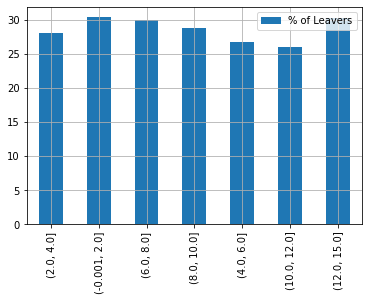

,Category,% of Leavers
0,"(2.0, 4.0]",28.135593
1,"(-0.001, 2.0]",30.372692
2,"(6.0, 8.0]",29.955947
3,"(8.0, 10.0]",28.846154
4,"(4.0, 6.0]",26.767677
5,"(10.0, 12.0]",26.086957
6,"(12.0, 15.0]",30.232558


In [85]:
yslp_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(yslp_data['YearsSinceLastPromotion'].unique()):
    ratio = yslp_data[(yslp_data['YearsSinceLastPromotion'] == item) & (yslp_data['Attrition'] == 'Yes')].shape[0] / yslp_data[yslp_data['YearsSinceLastPromotion'] == item].shape[0]
    yslp_col.loc[item] = (item, ratio * 100)

yslp_col.plot(kind='bar', grid=True)
plt.show()

yslp_col = yslp_col.reset_index(drop=True)
yslp_col

### Years With Current Manager

In [86]:
ywcm_data = df.loc[:, ('YearsWithCurrManager', 'Attrition')]

years_max = ywcm_data['YearsWithCurrManager'].max()
years_min = ywcm_data['YearsWithCurrManager'].min()

bins = np.linspace(years_min, years_max, 8)
bins = [int(x) for x in bins]

ywcm_data['YearsWithCurrManager'] = pd.cut(ywcm_data['YearsWithCurrManager'], bins=bins, include_lowest=True)

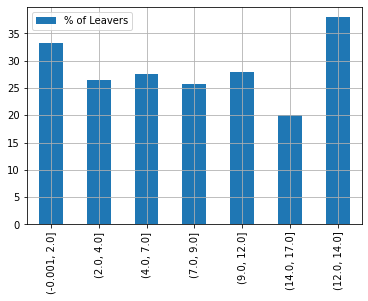

,Category,% of Leavers
0,"(-0.001, 2.0]",33.219178
1,"(2.0, 4.0]",26.498423
2,"(4.0, 7.0]",27.635328
3,"(7.0, 9.0]",25.663717
4,"(9.0, 12.0]",27.868852
5,"(14.0, 17.0]",20.000000
6,"(12.0, 14.0]",37.931034


In [87]:
ywcm_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(ywcm_data['YearsWithCurrManager'].unique()):
    ratio = ywcm_data[(ywcm_data['YearsWithCurrManager'] == item) & (ywcm_data['Attrition'] == 'Yes')].shape[0] / ywcm_data[ywcm_data['YearsWithCurrManager'] == item].shape[0]
    ywcm_col.loc[item] = (item, ratio * 100)

ywcm_col.plot(kind='bar', grid=True)
plt.show()

ywcm_col = ywcm_col.reset_index(drop=True)
ywcm_col

### Number Companies Worked

In [88]:
df['NumCompaniesWorked'].unique()

array([1., 3., 0., 5., 9., 4., 2., 6., 7., 8.])

In [89]:
ncw_data = df.loc[:, ('NumCompaniesWorked', 'Attrition')]

years_max = ncw_data['NumCompaniesWorked'].max()
years_min = ncw_data['NumCompaniesWorked'].min()

bins = np.linspace(years_min, years_max, 8)
bins = [int(x) for x in bins]

ncw_data['NumCompaniesWorked'] = pd.cut(ncw_data['NumCompaniesWorked'], bins=bins, include_lowest=True)

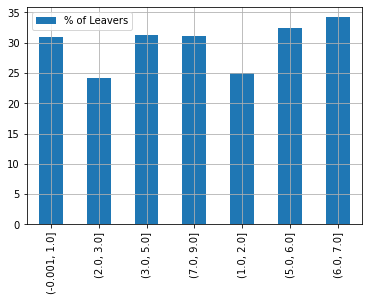

,Category,% of Leavers
0,"(-0.001, 1.0]",30.872124
1,"(2.0, 3.0]",24.170616
2,"(3.0, 5.0]",31.334623
3,"(7.0, 9.0]",31.178707
4,"(1.0, 2.0]",24.934383
5,"(5.0, 6.0]",32.386364
6,"(6.0, 7.0]",34.196891


In [90]:
ncw_col = pd.DataFrame(columns= ['Category', '% of Leavers'])

for item in list(ncw_data['NumCompaniesWorked'].unique()):
    ratio = ncw_data[(ncw_data['NumCompaniesWorked'] == item) & (ncw_data['Attrition'] == 'Yes')].shape[0] / ncw_data[ncw_data['NumCompaniesWorked'] == item].shape[0]
    ncw_col.loc[item] = (item, ratio * 100)

ncw_col.plot(kind='bar', grid=True)
plt.show()

ncw_col = ncw_col.reset_index(drop=True)
ncw_col

### Target Variable: Attrition

No     2680
Yes    1141
Name: Attrition, dtype: int64


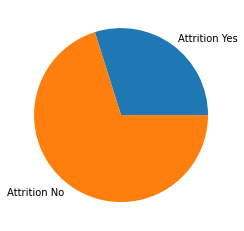

Percentage of Current Employees is 70.14 % and of Ex-employees is: 29.86 %


In [91]:
print(df['Attrition'].value_counts())
print('==============================')

data_y = len(df['Attrition'][df['Attrition'] == 'Yes'])
data_n = len(df['Attrition'][df['Attrition'] == 'No'])

labels = ['Attrition Yes', 'Attrition No']
plt.pie(np.array([data_y, data_n]), labels=labels)
plt.show()

percent_n = round((data_n / (data_y + data_n) * 100), 2)
percent_y = round((data_y / (data_y + data_n) * 100), 2)

print('==============================')
print(f"Percentage of Current Employees is {percent_n} % and of Ex-employees is: {percent_y} %")

## Correlation

In [92]:
corr_data = df.copy()

corr_data['Attrition'] = corr_data['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
corr_data.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.034389
NumCompaniesWorked          0.020105
HourlyRate                  0.009632
MonthlyRate                 0.004954
PercentSalaryHike          -0.005180
PerformanceRating          -0.008548
RelationshipSatisfaction   -0.014297
YearsSinceLastPromotion    -0.017825
WorkLifeBalance            -0.022412
Education                  -0.023622
TrainingTimesLastYear      -0.031740
DailyRate                  -0.032905
YearsAtCompany             -0.057244
JobInvolvement             -0.058452
EnvironmentSatisfaction    -0.060822
YearsWithCurrManager       -0.066139
MonthlyIncome              -0.075201
YearlyIncome               -0.075201
YearsInCurrentRole         -0.079151
JobSatisfaction            -0.081563
JobLevel                   -0.083085
Age                        -0.087790
TotalWorkingYears          -0.089837
StockOptionLevel           -0.096230
Name: Attrition, dtype: float64

## EDA Conclusion

- Przedstawione dane zawierały błędnę wartości, wartości brakujące, cześć danych wyglądala na sztucznie doklejone
- Niektóre kolumny nie niosą żadnych informacji, mianowicie: EmployeeCount, EmployeeNumber, StandardHours i Over18
- Dane są niezbalansowane, przeważa liczba obserwacji z obecnymi pracownikami
- Część danych ma szerokie spektrum wartości (tail heavy)
- Najsilniejsze pozytywne korelacje kolumny attrition występują z: DistanceFromHome, HourlyRate, NumCompaniesWorked
- Najsilniejsze negatywne korelacje występują z: StockOptionLevel, JobSatifaction, Age, TotalWorkingYears, JobLevel

- Największa rotacja pracowników jest w dziale Human Resources
- Ludzie bez wykrztałcenia wyższego częściej zmieniają pracę
- Mężczyźni częściej zmieniają pracę w porównaniu do kobiet, jest to nieznaczna różnica
- Osoby niebędące w formalnym związku odchodzą częściej
- Nadgodziny mają duży wpływ na zmianę pracy (różnica 14% między kategoriami)
- Najczęściej zmieniają pracę ludzie niezadowoleni 
- W ciągu pierwszych 4 lat występuję największa rotacja
- Ludzie niemogący pogodzić życia prywatnego z pracą częściej rezygnują 

# Machine Learning

In [93]:
df.shape

(3821, 32)

In [94]:
df_ml = df.copy()

# Pre-processing Pipeline

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3821 entries, 0 to 4432
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3821 non-null   float64
 1   Attrition                 3821 non-null   object 
 2   BusinessTravel            3821 non-null   object 
 3   DailyRate                 3821 non-null   float64
 4   Department                3821 non-null   object 
 5   DistanceFromHome          3821 non-null   float64
 6   Education                 3821 non-null   float64
 7   EducationField            3821 non-null   object 
 8   EnvironmentSatisfaction   3821 non-null   float64
 9   Gender                    3821 non-null   object 
 10  HourlyRate                3821 non-null   float64
 11  JobInvolvement            3821 non-null   float64
 12  JobLevel                  3821 non-null   float64
 13  JobRole                   3821 non-null   object 
 14  JobSatis

### Encoding

In [98]:
df_dummies = pd.get_dummies(df_ml, drop_first=True)

In [99]:
df_dummies

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,30.0,852.0,1.0,1.0,4.0,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,61512.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
1,38.0,397.0,2.0,2.0,4.0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,93072.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,26.0,841.0,6.0,3.0,3.0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,28416.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,28.0,1117.0,8.0,2.0,4.0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,39720.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,35.0,464.0,4.0,2.0,3.0,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,23412.0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,2.0,3.0,41.0,4.0,2.0,4.0,2571.0,12290.0,4.0,17.0,3.0,3.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0,30852.0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1466,39.0,613.0,6.0,1.0,4.0,42.0,2.0,3.0,1.0,9991.0,21457.0,4.0,15.0,3.0,1.0,1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0,119892.0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1467,27.0,155.0,4.0,3.0,2.0,87.0,4.0,2.0,2.0,6142.0,5174.0,1.0,20.0,4.0,2.0,1.0,6.0,0.0,3.0,6.0,2.0,0.0,3.0,73704.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1468,49.0,1023.0,2.0,3.0,4.0,63.0,2.0,2.0,2.0,5390.0,13243.0,2.0,14.0,3.0,4.0,0.0,17.0,3.0,2.0,9.0,6.0,0.0,8.0,64680.0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [100]:
df_dummies.shape

(3821, 46)

### Splitting data into training and testing sets

In [101]:
X = df_dummies.drop(columns=['Attrition_Yes'])
y = df_dummies['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Feature scaling

In [102]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
 
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

## Building Machine Learning Models

In [103]:
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----------------------------------')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')

##  Algorithms

### Logistic Regression

In [104]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train_scaled, y_train)

y_pred_lr = clf_lr.predict(X_test_scaled)

print_results(calculate_metrics(y_test, y_pred_lr), 'LogisticRegression')

Results for LogisticRegression
----------------------------------
  Accuracy:  0.7374476987447699
  Precision: 0.7248985987233129
  Recall:    0.7374476987447699
  F1 score:  0.6888935889594744
  Mislabeled 251 out of 956


### SVM

In [105]:
from sklearn import svm 
clf_svm = svm.SVC()
clf_svm.fit(X_train_scaled, y_train)

y_pred_svm = clf_svm.predict(X_test_scaled)

print_results(calculate_metrics(y_test, y_pred_svm), 'SVM')

Results for SVM
----------------------------------
  Accuracy:  0.7635983263598326
  Precision: 0.765497492507196
  Recall:    0.7635983263598326
  F1 score:  0.7247871456977119
  Mislabeled 226 out of 956


### KNN

In [106]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_scaled, y_train)

y_pred_knn = clf_knn.predict(X_test_scaled)

print_results(calculate_metrics(y_test, y_pred_knn), 'KNN')

Results for KNN
----------------------------------
  Accuracy:  0.696652719665272
  Precision: 0.6673170797124772
  Recall:    0.696652719665272
  F1 score:  0.6720462243474796
  Mislabeled 290 out of 956


### Decision Tree

In [107]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train_scaled, y_train)

y_pred_tree = clf_tree.predict(X_test_scaled)

print_results(calculate_metrics(y_test, y_pred_tree), 'DecisionTree')

Results for DecisionTree
----------------------------------
  Accuracy:  0.7186192468619247
  Precision: 0.7018642224282112
  Recall:    0.7186192468619247
  F1 score:  0.7062095062977345
  Mislabeled 269 out of 956


### Random Forest 

In [108]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_scaled, y_train)

y_pred_rf = clf_rf.predict(X_test_scaled)

print_results(calculate_metrics(y_test, y_pred_rf), 'RandomForest')

Results for RandomForest
----------------------------------
  Accuracy:  0.7353556485355649
  Precision: 0.7204801465461845
  Recall:    0.7353556485355649
  F1 score:  0.7236840338041889
  Mislabeled 253 out of 956


### Ada Boost

In [109]:
clf_ab = AdaBoostClassifier()
clf_ab.fit(X_train_scaled, y_train)

y_pred_ab = clf_ab.predict(X_test_scaled)

print_results(calculate_metrics(y_test, y_pred_ab), 'AdaBoost')

Results for AdaBoost
----------------------------------
  Accuracy:  0.7112970711297071
  Precision: 0.679370418950313
  Recall:    0.7112970711297071
  F1 score:  0.674519335510714
  Mislabeled 276 out of 956
